# Predicting the Price of a New York City Airbnb Listing

*Edwin Yu, Ramandeep Singh, Donghyeon Son*

![alt text](https://pix10.agoda.net/geo/city/318/1_318_02.jpg?s=1920x822)

## Introduction 

Airbnb is one of the largest online marketplaces for helping people find high-quality and affordable housing, but it also offers profitable opportunities for many hosts. Some hosts even become self-employed, full-timer to make a living off of Airbnb. To these hosts, Airbnb is more than just a place to earn a few dollars, but can also be a place to find a stable job that can support their lives. 

In this project, we analyze detailed listings data for New York City Airbnb to identify factors that might impact the price and performed multiple machine learning algorithms to predict the price given those factors. These models can help listing owners find accurate prices for their listings and everyday Airbnb users verify that the listings they are considering are being valued appropriately.

We found a website called [Inside Airbnb](http://insideairbnb.com/) that scraped detailed Airbnb listings across each major city, and decided to do our analysis on listing prices in New York City. 

**How to get the data: http://insideairbnb.com/get-the-data.html (Find "New York City, New York, United States", and download "listings.csv.gz" next to the description "Detailed Listings data for New York City")**

## Loading and Viewing the Dataset

We first need to import the necessary python libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install folium
import folium
import requests
import pandas as pd
import pandas
import numpy as np
import branca.colormap as cm
import seaborn as sns; sns.set(rc={'figure.figsize':(15,10)})
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from folium.plugins import HeatMap
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
pd.set_option('display.max_columns', 200)

We can use pandas to load the data from the our csv file into a dataframe.

In [2]:
data = pd.read_csv('../listings_raw.csv')

Let's examine the first 5 rows of our newly created dataframe, and use the built-in info() function to get a concise summary of our data.

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,85%,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",US,United States,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,$225.00,"$1,995.00",NaN,$350.00,$95.00,1,$0.00,10,1125,10,10,1125,1125,10.0,1125.0,2 weeks ago,t,1,1,1,1,2019-12-07,48,7,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['ema

In [4]:
data.info(max_cols = 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Data columns (total 106 columns):
id                                              50599 non-null int64
listing_url                                     50599 non-null object
scrape_id                                       50599 non-null int64
last_scraped                                    50599 non-null object
name                                            50582 non-null object
summary                                         48367 non-null object
space                                           36464 non-null object
description                                     49567 non-null object
experiences_offered                             50599 non-null object
neighborhood_overview                           33128 non-null object
notes                                           20623 non-null object
transit                                         33183 non-null object
access                                          2705

## Visualizing our Data

Let's create a heatmap to see if there are any relationships between location and price within New York City.
    We will be utilizing folium to create a heatmap. 
    More about folium can be found here: https://python-visualization.github.io/folium/

Note that we are selecting a random sample of 2,000 rows to create our heatmap with. There was no need to represent all sample of items on heatmap as we want to simply idenfity any form of relationships. We grouped the longitude and latitude coorindates into neighbourhoods, and set the initial location to the center of NYC.

In [5]:
hm_df = data[['latitude','longitude', 'neighbourhood', 'property_type', 'price']]
hm_df = hm_df.sample(n = 2000)

heat_map = folium.Map([40.7128, -74.0060], tiles='stamentoner', zoom_start=11)

count_df = hm_df.groupby('neighbourhood').mean()
count_df['count'] = hm_df['neighbourhood'].value_counts()

HeatMap(count_df[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']
                                                       ).sum().reset_index().values.tolist()).add_to(heat_map)

heat_map

After creating a heatmap, we noticed that heatmap alone was not good enough to portray what we wanted to demonstrate. So, we decided to add marker to indicate specific locations with top/low prices. 
More about folium marker can be found here: https://python-visualization.github.io/folium/quickstart.html

    Top price locations: red info-sign
    Low price locations: blue info-sign
    
After analyzing the heatmap, we noticed that most of places with top prices were located around manhattan and the price seemed to get cheeper as it moved further away from manhattan. This demonstrated that neighbourhood the listing is in has an impact on the price.

In [6]:
def stripDollarSign(line):
    return float(line.strip('$'))

## convert the string representation of price in the heatmap dataframe into floats
for index, row in hm_df.iterrows():
    if not pd.isnull(row['price']):
        hm_df.set_value(index,'price', stripDollarSign(row['price'].replace(",","")))

sort_df = hm_df.sort_values(by=['price'], ascending=False)

for index, row in sort_df.head(n = 10).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup= ('Neighbourhood: ' + str(row['neighbourhood']) + '<br>'
                 'Property type: ' + str(row['property_type']) + '<br>'
                 'Price: ' + str(round(row['price'],2))
                ),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(heat_map)
    
for index, row in sort_df.tail(n = 10).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup= ('Neighbourhood: ' + str(row['neighbourhood']) + '<br>'
                 'Property type: ' + str(row['property_type']) + '<br>'
                 'Price: ' + str(round(row['price'],2))
                ),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(heat_map)

heat_map

We then created a colormap to idenfiy the price range and the quartile of top 10 places with highest price.

In [7]:
new_df = sort_df.head(n = 10)
first_q = new_df['price'].quantile(0.25)
second_q = new_df['price'].quantile(0.50)
third_q = new_df['price'].quantile(0.75)
max = new_df['price'].max()

expensive = cm.StepColormap(
    ['lightgreen', 'yellow', 'orange', 'red'],
    vmin=0, vmax=max,
    index=[0, first_q, second_q, third_q, max],
    caption='expensive'
)

expensive

## Cleaning the Data

Our dataset has a total of 50599 rows and 106 columns, so we needed to figure out which columns are relevant to our goal of predicing a listing's price. 
We dropped a total of 64 columns for the reasons below:

* **id, scrape_id, host_id**: They aren't relevant to a listing's price, and each row in the dataframe already has a unique index
* **listing_url, thumbnail_url, medium_url, picture_url, xl_picture_url, host_url, host_thumbnail_url, host_picture_url**: These columns aren't relevant because we aren't going to need to open any of the links
* **last_scraped, host_since, first_review, last_review, calendar_last_scraped**: We dropped all columns consisting of dates for simplicity
* **name, summary, space, description, neighborhood_overview, notes, transit, access, interaction, house_rules, host_about**: Since we aren't using NLP in our project, we discarded all columns consisting of text. 
* **experiences_offered**: An airbnb experiences is separate from a listing
* **host_location, street, neighbourhood, neighbourhood_cleasned, city, state, zipcode, market, smart_location, country_code, country, is_location_exact**: Dropped because the dataset only has lisings in New York City, and we decided to use neighbourhood_group_cleansed to represent the unique suburb the listing is in 
* **host_acceptance_rate, license, jurisdiction, square_feet**: Dropped because it had mostly null values
* **host_verifications**: Dropped because we didn't believe it had a reasonable association with the listing's price
* **minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm**: Values overlapped with the minimum_nights and maximum_nights columns, so we used those two instead.
* **calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365**: We are only concerned about if the listing is avaliable now, which they are all
* **number_of_reviews_ltm**: We kept number_of_reviews instead
* **requires_license**: All of the listings require a license
* **weekly_price, monthly_price**: Mostly null values, and we only care about the daily listing price
* **cancellation_policy, is_business_travel_ready**: Did not thin it was relevant to a listing's price

We kept the remaining features for the following reasons:

* **host_response_rate, host_response_time, host_is_superhost, host_listings_count, host_total_listings_count, host_has_profile_pic, host_identity_verified**: Kept these features that are host-centric because we believe that such features help build credibility with the host, allowing them to raise their price (at least marginally). Also, we think that the higher the response rate, the more that the host actually cares about the people who bought the listing, which could also help the host become a superhost in the future and raise their prices even further.
* **accommodates, bathrooms, bedrooms, beds, property_type, room_type, bed_type, guests_included**: These are all features that tell us information about the room itself, such as how many bedrooms and bathrooms as well as the type of each. It also tells us how many people can live in this listing, and how many guests can be brought over. So, we believe that these factors would be important when people are deciding on which listing to rent.
* **price**: This is the feature that we’re trying to predict, so it is imperative that we keep this in order to verify the accuracy of our model.
* **security_deposit, cleaning_fee, extra_people**: All of these features relate to extra money that the user has to give up in order to successfully book the listing as well as how much money would be required to bring extra people. So, we believe that these features would end up raising the overall price since the host cares about security and making sure the listing stays clean.
* **minimum_nights, maximum_nights**: These features tell us how long someone must stay for and how long they could stay for at the listing. We believe that these features are important because the amount of time that a host is willing to give could have some kind of correlation with price.
* **number_of_reviews, reviews_per_month, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value**: For any listing on Airbnb, the specific ratings for attributes like cleanliness and communication are shown, as well as how many reviews the listing has, which these features signify. So, we kept these features because we believe that the number of reviews and how well-rated a listing is would be factored in deciding the price.
* **instant_bookable**: Kept this feature even though not many listings are actually able to booked instantly because we certainly believe that the appeal and usefulness of instant booking would raise the price.
* **require_guest_profile_picture, require_guest_phone_verification**: We kept these features because they show that the host cares about security and making sure that the guests themselves are safe people. So, if the host cares about security, then we presume that the host would also raise the price so that not just anyone can buy the listing.
* **calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms**: All of these features essentially tell us that how many listings that the host currently has as well as what types of listing those may be. These features can also associate hosts to businesses rather than individual homeowners. We kept these features because we believe that it’s possible that they might correlate with the pricing of listings as well.
* **neighbourhood_group_cleansed**: We kept this feature because we expect the type of neighborhood/borough that the listing is in to correlate with the price.

In [8]:
columns_to_drop = ['listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered',
                   'neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url',
                   'medium_url','picture_url','xl_picture_url','host_url','host_about','host_acceptance_rate',
                   'host_thumbnail_url', 'host_picture_url', 'host_verifications','host_neighbourhood','host_location',
                   'street','neighbourhood','neighbourhood_cleansed','city','state','zipcode','market','smart_location',
                   'country_code','country','is_location_exact','minimum_minimum_nights','maximum_minimum_nights',
                   'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                   'calendar_updated','availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                   'number_of_reviews_ltm','first_review', 'last_review', 'requires_license', 'license',
                   'jurisdiction_names','has_availability','availability_30','is_business_travel_ready','name',
                   'id','host_id','host_name','cancellation_policy','weekly_price','monthly_price','square_feet',
                   'host_since']
data.drop(columns_to_drop,axis=1, inplace=True)

Now that we have dropped the columns we don't need, we can begin cleaning the dataset so that it is usable for plotting and machine learning. 

We first want to convert the categorical variables (**host_response_time, neighbourhood_group_cleansed, property_type, room_type, and bed_type**) into binary vectors using one hot encoding.

In [9]:
data = pd.get_dummies(data, columns=['host_response_time', 'neighbourhood_group_cleansed', 
                                     'property_type', 'room_type', 'bed_type'])

We now need to do the following steps:

1. Strip \$ and \% characters from strings in **host_response_rate**, **price**, **security_deposit**, **cleaning_fee**, and **extra_people**
2. Convert all boolean true/false values into 1/0 so that we can use them as features in our machine learning models.
3. Add a new column **num_amenities** that represents the number of amenities in the listing and gives each one the same weight

In [10]:
data['num_amenities'] = np.nan

for index, row in data.iterrows():
    
    if not pd.isnull(row['host_response_rate']):
        data.set_value(index,'host_response_rate', float(row['host_response_rate'].strip('%')) / 100.0)
   
    data.set_value(index,'host_is_superhost',1 if row['host_is_superhost'] == 't' else 0)
    data.set_value(index,'host_has_profile_pic',1 if row['host_has_profile_pic'] == 't' else 0)
    data.set_value(index,'host_identity_verified',1 if row['host_identity_verified'] == 't' else 0)
    
    amenities = row['amenities']
    data.set_value(index, 'num_amenities', len(amenities.split(',')))
    
    if not pd.isnull(row['price']):
        data.set_value(index,'price', stripDollarSign(row['price'].replace(",","")))
    
    if not pd.isnull(row['security_deposit']):
        data.set_value(index,'security_deposit', stripDollarSign(row['security_deposit'].replace(",","")))
    else:
        data.set_value(index,'security_deposit', 0.0)
    
    if not pd.isnull(row['cleaning_fee']):
        data.set_value(index,'cleaning_fee', stripDollarSign(row['cleaning_fee'].replace(",","")))
    else:
        data.set_value(index,'cleaning_fee', 0.0)
    
    if not pd.isnull(row['extra_people']):
        data.set_value(index,'extra_people', stripDollarSign(row['extra_people'].replace(",","")))
    else:
        data.set_value(index,'extra_people', 0.0)
        
    if pd.isnull(row['bathrooms']):
        data.set_value(index,'bathrooms',0.0)
        
    if pd.isnull(row['bedrooms']):
        data.set_value(index,'bedrooms',0.0)
    
    if pd.isnull(row['beds']):
        data.set_value(index,'beds',0.0)
    
    data.set_value(index,'instant_bookable',1 if row['instant_bookable'] == 't' else 0)
    data.set_value(index,'require_guest_profile_picture',1 if row['require_guest_profile_picture'] == 't' else 0)
    data.set_value(index,'require_guest_phone_verification',1 if row['require_guest_phone_verification'] == 't' else 0)
    

Since we see that the remaining null elements are only in columns that have decimal values, we can fill in the rest of the NaN objects with 0.0.

In [11]:
data.info(max_cols = 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Data columns (total 90 columns):
host_response_rate                              32941 non-null object
host_is_superhost                               50599 non-null object
host_listings_count                             50036 non-null float64
host_total_listings_count                       50036 non-null float64
host_has_profile_pic                            50599 non-null object
host_identity_verified                          50599 non-null object
latitude                                        50599 non-null float64
longitude                                       50599 non-null float64
accommodates                                    50599 non-null int64
bathrooms                                       50599 non-null float64
bedrooms                                        50599 non-null float64
beds                                            50599 non-null float64
amenities                                    

In [12]:
data.fillna(0.0, inplace=True)

Our clean dataset!

In [13]:
data.head(10)

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Island,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,num_amenities
0,0.85,0,6.0,6.0,1,1,40.75362,-73.98377,1,1.0,0.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225.0,350.0,95.0,1,0.0,10,1125,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1,1,1,1,0,0,0.39,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,37.0
1,1.00,0,1.0,1.0,1,1,40.68514,-73.95976,3,1.0,1.0,4.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89.0,500.0,0.0,1,0.0,1,730,295,90.0,9.0,9.0,10.0,9.0,10.0,9.0,0,0,0,1,1,0,0,4.67,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,38.0
2,0.00,0,1.0,1.0,1,0,40.74767,-73.97500,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,300.0,125.0,2,100.0,3,21,78,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,1,1,1,1,0,0,0.60,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,32.0
3,1.00,0,1.0,1.0,1,0,40.68688,-73.95596,2,0.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60.0,450.0,0.0,1,30.0,29,730,49,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0,0,0,1,0,1,0,0.38,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,6.0
4,1.00,0,1.0,1.0,1,0,40.76489,-73.98493,2,1.0,1.0,1.0,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79.0,0.0,15.0,1,12.0,2,14,454,84.0,9.0,7.0,9.0,9.0,10.0,8.0,0,0,0,1,0,1,0,3.52,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,20.0
5,0.00,0,1.0,1.0,1,1,40.80178,-73.96723,1,1.0,1.0,1.0,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",79.0,0.0,0.0,1,0.0,2,14,118,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,1,0,1,0,0.95,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,23.0
6,1.00,1,4.0,4.0,1,1,40.71344,-73.99037,3,1.0,1.0,2.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",150.0,0.0

## Examining the Data

Let's see how our data looks with plots! Below are plots show that the mean and median of prices for each borough in NYC.

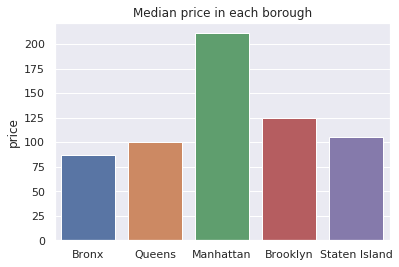

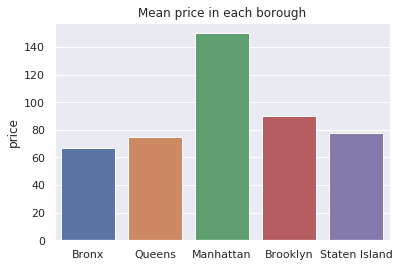

In [14]:
boroughs = ['Bronx', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island']
borough_average_price = {}
borough_median_price = {}

average_median = data['price'].median()
average_mean = data['price'].mean()

for borough in boroughs:
    current_borough = data[data['neighbourhood_group_cleansed_' + str(borough)] == 1]
    curr_mean = current_borough['price'].mean()
    curr_median = current_borough['price'].median()
    borough_average_price[borough] = curr_mean
    borough_median_price[borough] = curr_median
    
sns.barplot(list(borough_average_price.keys()), list(borough_average_price.values())).set(ylabel='price', 
                                                                                        title='Median price in each borough')
plt.show()

sns.barplot(list(borough_median_price.keys()), list(borough_median_price.values())).set(ylabel='price',
                                                                                       title='Mean price in each borough')
plt.show()

We knew that Manhattan would clearly
have a higher price than any of the other boroughs, being about 40% higher in both cases. The Bronx having the lowest
prices is also not too surprising, as it's the most unappealing out of the five to most people. We were surprised
that Staten Island was trailing just behind Brookyln, since it gives a difficult commute to reach Manhattan, but
we suppose that prices are high due to it being a tourist attraction.

We can now find and observe the residual plots based on three features alone: property, room, and bed types 

In [15]:
def showModelAndResiduals(col_type):
    df = data.filter(regex=str(col_type))
    
    Y = data['price']

    df = sm.add_constant(df.drop(df.columns[[0]], axis=1))
    model = sm.OLS(Y, df).fit()
    print("This model is to show how " + str(col_type) + " correlates with price")
    print(model.summary())
    
    residuals = data['price'] - model.predict(df)
    
    plt.ylabel('residuals')
    plt.title('Residuals plot of price using a model based on only ' + str(col_type))
    sns.violinplot(x='price', y=residuals, data=data, palette="muted")
    plt.show()

This model is to show how property_type correlates with price
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:58:39   Log-Likelihood:            -3.6616e+05
No. Observations:               50599   AIC:                         7.324e+05
Df Residuals:                   50564   BIC:                         7.327e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

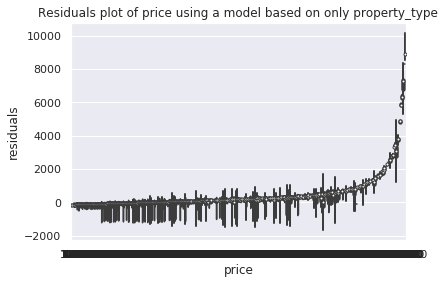

This model is to show how room_type correlates with price
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     435.4
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          2.66e-279
Time:                        16:59:06   Log-Likelihood:            -3.6728e+05
No. Observations:               50599   AIC:                         7.346e+05
Df Residuals:                   50595   BIC:                         7.346e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

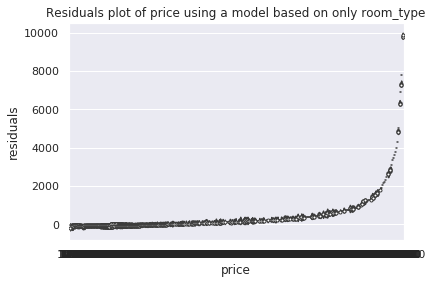

This model is to show how bed_type correlates with price
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.631
Date:                Mon, 16 Dec 2019   Prob (F-statistic):            0.00580
Time:                        16:59:28   Log-Likelihood:            -3.6792e+05
No. Observations:               50599   AIC:                         7.358e+05
Df Residuals:                   50594   BIC:                         7.359e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

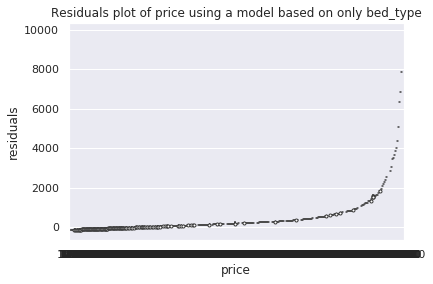

In [16]:
all_types = ['property_type', 'room_type', 'bed_type']

for col_type in all_types:
    showModelAndResiduals(str(col_type))

As shown by these plots, the property type seems to have the most "linear" relationship, although
that may just be due to the overwhelming number of property types compared to the small amount of room and bed types given.
Also, from these plots we assume that there is no strong linear relationship between price and property, room, or bed type.

We also decided to identify if there were any correlations between price and the best factors. However, we noticed the general trend of very low correlation for all factors. This is why we decided to just stick with our intuitions and stick with factors that we believed would have an impact on price. Below is a correlation matrix to display the correlation of our top features and the price.

In [17]:
df = data[['security_deposit','cleaning_fee', 'extra_people', 'price']]
result = df.corr(method ="pearson") 
result.style.background_gradient(cmap='coolwarm').set_precision(2)

,security_deposit,cleaning_fee,extra_people,price
security_deposit,1,0.4,0.14,0.11
cleaning_fee,0.4,1,0.17,0.16
extra_people,0.14,0.17,1,0.027
price,0.11,0.16,0.027,1


## Machine Learning

We can now create a model to predict an Airbnb listing's price with our dataset and sklearn! 

Lets drop the amenities (since we already created the num_amenities column), latitude, and longitude (we only needed them for our visualizations) columns.

In [18]:
data.drop(['amenities','longitude','latitude'],axis=1, inplace=True)

We are going to use the following 86 features to predict an Airbnb listing's price.

In [19]:
data.head(10)

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Island,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,num_amenities
0,0.85,0,6.0,6.0,1,1,1,1.0,0.0,1.0,225.0,350.0,95.0,1,0.0,10,1125,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1,1,1,1,0,0,0.39,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,37.0
1,1.00,0,1.0,1.0,1,1,3,1.0,1.0,4.0,89.0,500.0,0.0,1,0.0,1,730,295,90.0,9.0,9.0,10.0,9.0,10.0,9.0,0,0,0,1,1,0,0,4.67,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,38.0
2,0.00,0,1.0,1.0,1,0,2,1.0,1.0,1.0,200.0,300.0,125.0,2,100.0,3,21,78,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,1,1,1,1,0,0,0.60,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,32.0
3,1.00,0,1.0,1.0,1,0,2,0.0,1.0,1.0,60.0,450.0,0.0,1,30.0,29,730,49,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0,0,0,1,0,1,0,0.38,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,6.0
4,1.00,0,1.0,1.0,1,0,2,1.0,1.0,1.0,79.0,0.0,15.0,1,12.0,2,14,454,84.0,9.0,7.0,9.0,9.0,10.0,8.0,0,0,0,1,0,1,0,3.52,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,20.0
5,0.00,0,1.0,1.0,1,1,1,1.0,1.0,1.0,79.0,0.0,0.0,1,0.0,2,14,118,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,1,0,1,0,0.95,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,23.0
6,1.00,1,4.0,4.0,1,1,3,1.0,1.0,2.0,150.0,0.0,40.0,2,10.0,1,1125,161,94.0,10.0,9.0,10.0,10.0,9.0,9.0,0,0,0,4,2,0,2,1.29,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,27.0
7,1.00,1,1.0,1.0,1,1,2,1.0,1.0,1.0,85.0,200.0,0.0,1,0.0,3,7,204,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,1,0,1,0,1.56,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,17.0
8,1.00,1,3.0,3.0,1,1,2,1.5,1.0,0.0,89.0,200.0,67.0,1,22.0,4,14,175,94.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,3,1,2,0,1.35,0,0,1,0,0,1,

Let's split our data into a train and test set, with a ratio of (75:25).

In [20]:
X = data.drop('price',axis=1)
y = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Linear Regression

More about Linear Regression can be found here: https://machinelearningmastery.com/linear-regression-for-machine-learning/

Firstly, we are going to see how our data performs with a simple Linear Regression model.

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("R^2 Training score: ", lin_reg.score(X_train, y_train))
print("R^2 Testing score: ", lin_reg.score(X_test, y_test))

R^2 Training score:  0.16263627658530333
R^2 Testing score:  0.18173697215623574


An R^2 value of 0.182 suggests that the error is very high, and there seems to be no linear relationship between our features and the value we are trying to predict. 

### Random Forest 

More about Random Forest can be found here: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

Next, we are going to try to model our data with a Random Forest to see if it can better capture our data's non linear relationship to the price. Since it has hyperparameters, that we need to tune, we are going to use GridSearchCV to search for the hyperparameters that will give us the best score. We decided to prioritize n_estimators, max_depth, min_samples_split, and min_samples_leaf, and we did a 3 fold cross validation with 16 tasks. Ideally, we would want to try a larger range of parameters to grid search through, but we decided to keep it simple for this project.

In [22]:
randomForestModel = RandomForestRegressor(random_state = 1, n_estimators = 10, min_samples_split = 1) 

n_estimators = [100, 200]
max_depth = [5, 15]
min_samples_split = [2, 10]
min_samples_leaf = [2, 5] 

tuned_param = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

# Using grid search to find the best hyper parameters for n_estimators, max_depth, min_samples_split, and min_samples_leaf

clf = GridSearchCV(estimator=randomForestModel, param_grid=tuned_param, cv = 3, n_jobs = -1, verbose=1, scoring='r2')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 10.0min finished


{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.5137519727915357


Now that we found the best combination of hyperparameters for our model, we can create our Random Forest model and analyze its performance. 

In [23]:
bestForest = RandomForestRegressor(random_state=1, n_estimators= 100, max_depth=15, min_samples_leaf=2, min_samples_split=2)
bestForest.fit(X_train,y_train)
y_pred = bestForest.predict(X_test)
print("R^2 Training Score: ", bestForest.score(X_train, y_train))
print("R^2 Testing Score: ", bestForest.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2 Training Score:  0.7999084201863356
R^2 Testing Score:  0.3088443857839852
Mean Absolute Error: 62.234851380405765
Mean Squared Error: 77956.49326184446
Root Mean Squared Error: 279.2069004552797


An R^2 value of 0.3 means that it definetly performed better than our Linear Regression model, but it still is far from being accurate. Our Mean Absolute Error is 62.23, which turns out to be around 40% of the average price in our data ($158.2). Another concerning result is our R^2 Training score (0.799) being significantly higher than our R^2 Testing score, meaning that our Random Forest is heavily overfitting our data towards the training set. This suggests that the hyperparameters we picked are not the most optimal for our dataset.

### K Nearest Neighbors

More about K Nearest Neighbors can be found here: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

We are now going to try modelling our data with the K Nearest Neighbors algorithm, as it would make sense that the listings with similar features should also have similar prices. Again, we are going to use GridSearchCV with a 3 fold cross validation to find the best hyperparameters for our data. 

In [24]:
knn = KNeighborsRegressor()

tuned_param = {'n_neighbors': [10,25,50], 'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']}

# Using grid search to find the best hyper parameters for n_neighbors, weights, and metric

gridSearch = GridSearchCV(estimator=knn, param_grid=tuned_param, cv = 3, scoring='r2', verbose = 1, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print(gridSearch.best_params_)
print(gridSearch.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.7min finished


{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}
0.3670949657607942


In [25]:
bestKnn = KNeighborsRegressor(metric='manhattan', n_neighbors= 25, weights='distance')
bestKnn.fit(X_train,y_train)
y_pred_knn = bestKnn.predict(X_test)
print("R^2 Training Score: ", bestKnn.score(X_train, y_train))
print("R^2 Testing Score: ", bestKnn.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

R^2 Training Score:  0.9981760121127928
R^2 Testing Score:  0.37619442946151627
Mean Absolute Error: 69.67289780987949
Mean Squared Error: 70359.97936809863
Root Mean Squared Error: 265.2545557914107


With the KNN, our R^2 testing score has increased to 0.37, our root mean squared error has decreased to 265.25, but our mean absolute error has increased to 69.672. Overall, this is a slight improvement, but it suggests that the features we chose do not have a strong indication to a listing's price. The massive overfitting also implies that we did not choose a large enough n_neighbors value for our dataset, which we can improve by doing a more exhaustive grid search. 

### Feature Selection

Let's now look at the top 16 most important features from our Random Forest Model and see if using them can improve our models by decreasing the amount of noise in our dataset. 

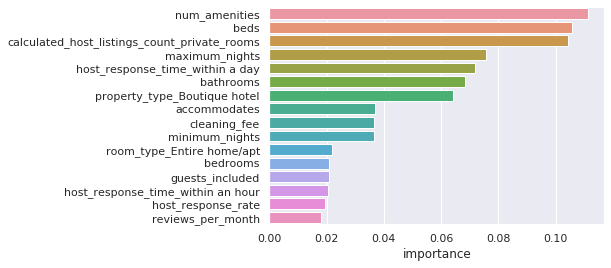

In [26]:
num_features = 16

feature_importances = pd.DataFrame(bestForest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

sns.barplot(x="importance",y=feature_importances[:num_features].index, data=feature_importances[:num_features])

Creating new training and testing splits (75:25)

In [27]:
X_new_features = data[feature_importances[:num_features].index]
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_new_features, y, test_size = 0.25, random_state = 42)

#### Making a new Random Forest model with the top 16 features

In [28]:
updatedForest = RandomForestRegressor(random_state=1, n_estimators= 100, max_depth=15, min_samples_leaf=2, min_samples_split=2)
updatedForest.fit(X_train_updated,y_train_updated)
y_pred_new_features = updatedForest.predict(X_test_updated)
print("R^2 Training Score: ", updatedForest.score(X_train_updated, y_train_updated))
print("R^2 Testing Score: ", updatedForest.score(X_test_updated, y_test_updated))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_updated, y_pred_new_features))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_updated, y_pred_new_features))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_updated, y_pred_new_features)))

R^2 Training Score:  0.7747605936508084
R^2 Testing Score:  0.3156753635236669
Mean Absolute Error: 67.48050137434342
Mean Squared Error: 77186.01688983475
Root Mean Squared Error: 277.823715492099


Limiting our features to the top 16 most important ones seemed to have very slightly increased our R^2 testing score and lowered our root mean squared error. However, our model is still performing extremely poorly despite the changes. 

#### Making a new KNN model with the top 16 features

In [29]:
updatedKnn = KNeighborsRegressor(metric='manhattan', n_neighbors= 25, weights='distance')
updatedKnn.fit(X_train_updated,y_train_updated)
y_pred_new_features = updatedKnn.predict(X_test_updated)
print("R^2 Training Score: ", updatedKnn.score(X_train_updated, y_train_updated))
print("R^2 Testing Score: ", updatedKnn.score(X_test_updated, y_test_updated))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_updated, y_pred_new_features))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_updated, y_pred_new_features))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_updated, y_pred_new_features)))

R^2 Training Score:  0.9938340257022967
R^2 Testing Score:  0.29372612351811533
Mean Absolute Error: 69.1894682335196
Mean Squared Error: 79661.70506396075
Root Mean Squared Error: 282.244052309275


Scaling the number of features down to 16 actually caused our KNN model to perform noticiably worse, with the R^2 testing score dropping from 0.37 to 0.29, and the RMSE increasing from 265 to 282. Overall, this suggests that removing features with low importance can be detrimental to your data modelling process. 

## Analyzing our results

Based off the R^2 Testing score, our highest performing model is our KNN with 86 features. Lets plot a residual graph of our predicted prices vs the expected prices for that model.

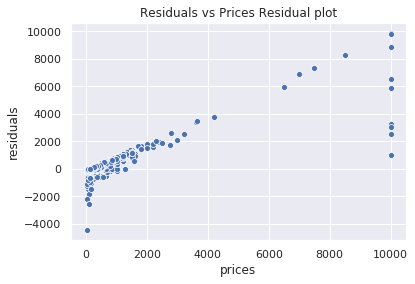

In [30]:
residuals = y_test - y_pred_knn
plot_data = pandas.DataFrame(dict(residuals = residuals, prices = y_test)).reset_index()

ax = sns.scatterplot(x="prices", y="residuals", data=plot_data)
ax.set(title="Residuals vs Prices Residual plot")
plt.show()

From the residual vs expected prices plot, we can see that there are some values that are around zero, meaning that some of our predictions are accurate. However, the graph has a linear trend, which suggests that as the price increases, the more difficult it is for our model to predict an accurate price.

## Conclusion

All in all, we learned that our belief that some features we thought had a correlation with price, such as how many
amenities and beds the listing has, turned out to be true, but some features, like how many listings a host has
for private rooms, also has a decent correlation with price.

We ended up with a less than stellar model, whether that's due to using the wrong machine learning method or something else,
but we can still use this data to help other people know what to look for when trying to find a good, cheap listing. Furthermore, people who want to be hosts can also see that a good response rate will make people like you and, presumably, give you better reviews, leading you to be able to raise your prices.

One way that we may be able to improve the data is by adding NLP elements to our project, since we had to drop many text-heavy features that can potentially be an important factor to determining the price of a listing.

For further exploration, we could look at different cities, such as Los Angeles or Seattle, or even different continents, in order to see what factors other geographic locations prefer the most. Furthermore, many people believe that Airbnb is ruining the rental market and raising prices, so we could also use this data and compare it to that of regular rentals and compare factors, such as how many beds and bathrooms are there, and see if the prices match up or if there's some kind of correlation in order to give conclusive evidence as to whether Airbnb is truly hurting or helping the market.